In [1]:
import pdb
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import sys
ori_path = '../images/original/'
border = 20
xys = np.load('../images/gaussian_blur/tracked_pts.npy')
neighbors = np.load('../images/gaussian_blur/neighbors.npy')
neighbors = neighbors.item()
warp_x = np.load('warpx.npy')
warp_y = np.load('warpy.npy')
xys.shape

(409, 28, 2)

In [24]:
pt_idxs = [50, 91, 125, 150, 203]

center_base_pts = [89,131,132,278]
centers = np.zeros((28,2))
for i, ptidx in enumerate(center_base_pts): 
    pt = xys[ptidx,:,:]
    centers+= pt
centers = centers/len(center_base_pts)    

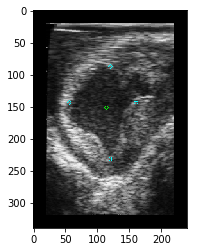

In [31]:
x, y = centers[0,0], centers[0,1]
img = cv.imread(ori_path+'4052.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_warp = cv.remap(gray, warp_x, warp_y, cv.INTER_LINEAR)
gray_warp = cv.copyMakeBorder(gray_warp, border, border, border, border, cv.BORDER_CONSTANT)
img = cv.cvtColor(gray_warp,cv.COLOR_GRAY2RGB)

cv.circle(img, (int(x), int(y)), 3, (0, 255, 0))
for j in center_base_pts: 
    x, y = xys[j,0, 0], xys[j, 0, 1]
    cv.circle(img, (int(x), int(y)), 3, (0, 255, 255))

plt.figure()
plt.imshow(img)
plt.show()

In [37]:
pt_idx = pt_idxs[0]
pt_neighbor_idxs = neighbors[pt_idx]

pt = xys[pt_idx,:,:]
neighbs = np.zeros((len(pt_neighbor_idxs), 28,2))
for ii, i in enumerate(pt_neighbor_idxs): 
    neighbs[ii,:,:] = xys[i,:,:]

cs = np.zeros((len(pt_neighbor_idxs), 28))
rs = np.zeros((len(pt_neighbor_idxs), 28))
   

In [38]:
for frame in range(18): 
    for neib_num in range(len(pt_neighbor_idxs)):
        x,y = pt[frame,:]
        neib_x, neib_y = neighbs[neib_num, frame,:]
        cx, cy = centers[frame,:]
        from_center = np.array([x-cx, y-cy])
        from_center = from_center / np.linalg.norm(from_center)
        arrow = np.array([x-neib_x, y-neib_y])
        
        r = np.abs(np.dot(arrow, from_center))
        rs[neib_num, frame] = r
        cs[neib_num, frame] = np.sqrt(np.linalg.norm(arrow)**2 - r**2)

In [39]:
x, y = centers[0,0], centers[0,1]
img = cv.imread(ori_path+'4052.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_warp = cv.remap(gray, warp_x, warp_y, cv.INTER_LINEAR)
gray_warp = cv.copyMakeBorder(gray_warp, border, border, border, border, cv.BORDER_CONSTANT)
img = cv.cvtColor(gray_warp,cv.COLOR_GRAY2RGB)

cv.circle(img, (int(x), int(y)), 3, (0, 255, 0))
cv.circle(img, (int(pt[0, 0]), int(pt[0, 1])), 3, (255, 0, 0))

for i in pt_neighbor_idxs:
    cv.circle(img, (int(xys[i, 0, 0]), int(xys[i, 0, 1])), 3, (255, 255, 0))

In [40]:
radial = rs.copy()
circumferecial = cs.copy()
for i in range(rs.shape[0]):
    radial[i,0:18] = radial[i,0:18]/rs[i,8]
    circumferecial[i,0:18] = circumferecial[i,0:18]/cs[i,8]

[41, 42, 49, 51, 61, 62, 63]


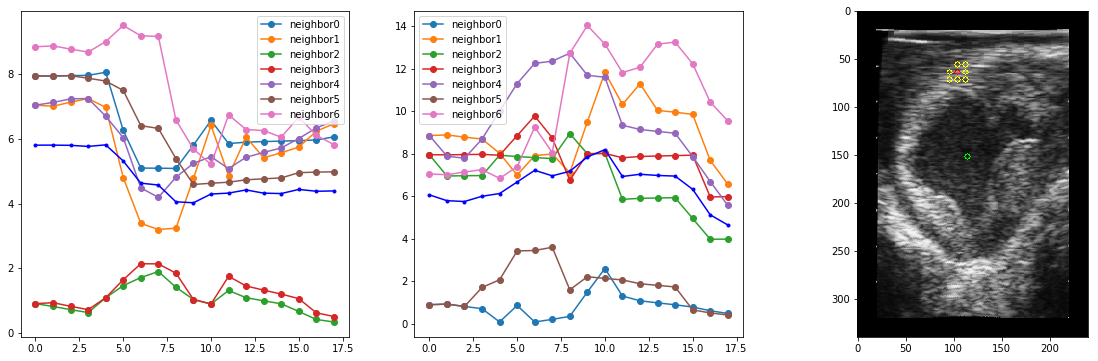

In [42]:
print(pt_neighbor_idxs)
t = np.arange(18)
plt.figure(figsize=(20,6))
plt.subplot(131)
for i in range(len(pt_neighbor_idxs)):
    plt.plot(t, rs[i,0:18],'o-',label='neighbor'+str(i))
plt.plot(t, rs[:,0:18].mean(axis=0),'.-',color='b')
plt.legend()
plt.subplot(132)
for i in range(len(pt_neighbor_idxs)):
    plt.plot(t, cs[i,0:18],'o-',label='neighbor'+str(i))
plt.plot(t, cs[:,0:18].mean(axis=0),'.-',color='b')
plt.legend()

plt.subplot(133)
plt.imshow(img)
plt.show()

[41, 42, 49, 51, 61, 62, 63]


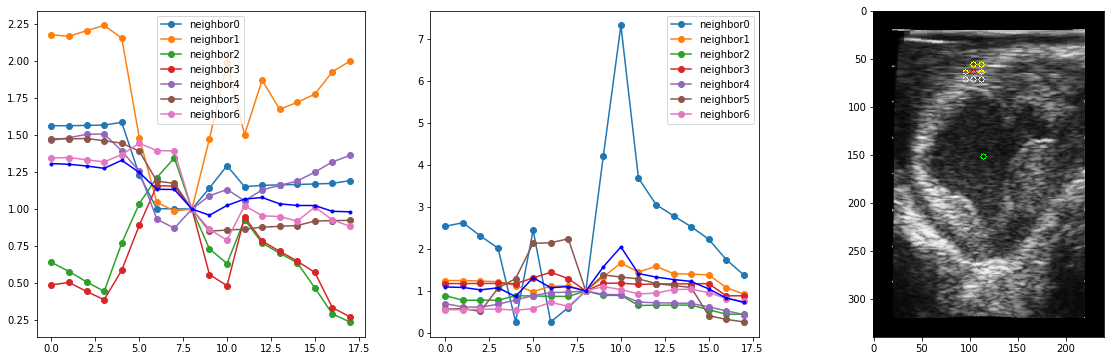

In [43]:
print(pt_neighbor_idxs)
t = np.arange(18)
plt.figure(figsize=(20,6))
plt.subplot(131)
for i in range(len(pt_neighbor_idxs)):
    plt.plot(t, radial[i,0:18],'o-',label='neighbor'+str(i))
plt.plot(t, radial[:,0:18].mean(axis=0),'.-',color='b')
plt.legend()
plt.subplot(132)
for i in range(len(pt_neighbor_idxs)):
    plt.plot(t, circumferecial[i,0:18],'o-',label='neighbor'+str(i))
plt.plot(t, circumferecial[:,0:18].mean(axis=0),'.-',color='b')
plt.legend()

plt.subplot(133)
plt.imshow(img)
plt.show()